In [112]:
import numpy as np
import pandas as pd

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from sklearn import tree

In [115]:
clf = tree.DecisionTreeClassifier(min_samples_split=5,
                                 random_state=123)

In [116]:
train = pd.read_csv('X_train_new.csv')

In [117]:
test = pd.read_csv('X_test_new.csv')

In [118]:
X_train = train.drop(['Survived','Name','Ticket'], axis=1)
X_test = test.drop(['Survived','Name','Ticket'], axis=1)

In [119]:
y_train=train['Survived']
y_test=test['Survived']

In [120]:
clf = clf.fit(X_train, y_train)

[Text(350.238, 211.4, 'X[2] <= 0.5\nentropy = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(172.422, 199.32, 'X[5] <= 26.269\nentropy = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(44.64, 187.24, 'X[8] <= 14.538\nentropy = 0.226\nsamples = 415\nvalue = [361, 54]'),
 Text(11.904, 175.16, 'X[0] <= 67.0\nentropy = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(5.952, 163.07999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(17.856, 163.07999999999998, 'X[8] <= 10.0\nentropy = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(11.904, 151.0, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(23.808, 151.0, 'entropy = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(77.376, 175.16, 'X[8] <= 22.73\nentropy = 0.18\nsamples = 399\nvalue = [359, 40]'),
 Text(41.664, 163.07999999999998, 'X[8] <= 22.097\nentropy = 0.273\nsamples = 92\nvalue = [77, 15]'),
 Text(35.712, 151.0, 'X[4] <= 0.5\nentropy = 0.219\nsamples = 88\nvalue = [77, 11]'),
 Text(20.832, 138.92000000000002, 'X[0] <

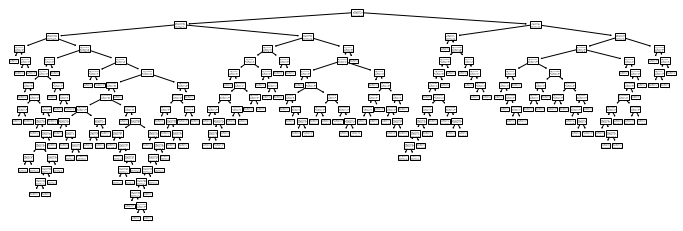

In [121]:
plt.figure(figsize=(12,4))
tree.plot_tree(clf)

In [122]:
dtc_pred = clf.predict(X_test)

In [168]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [125]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.38      0.50       266
         1.0       0.41      0.77      0.54       152

    accuracy                           0.52       418
   macro avg       0.58      0.57      0.52       418
weighted avg       0.62      0.52      0.51       418



In [128]:
confusion_matrix(y_test, dtc_pred)
acc = accuracy_score(y_test, dtc_pred)*100
print(acc)

51.91387559808612


In [163]:
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV

In [136]:
params = dict(
    n_estimators = [2,5,10,15,20,25,30,40,50,60,70,80,100,125,150,200],
    criterion = ['gini', 'entropy'],
    max_depth = [2,5,10,15,20,25,30,40,50,60,70,80,100,125,150,200,300,400,500,700,1000],
    min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
rf = ensemble.RandomForestClassifier()
rfc = RandomizedSearchCV(rf, params, random_state=123,cv=10)

In [137]:
rfc = rfc.fit(X_train, y_train)
rfc.best_params_

C:\Users\Prestela\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 15,
 'min_samples_leaf': 6,
 'max_depth': 80,
 'criterion': 'entropy'}

In [152]:
rfc = ensemble.RandomForestClassifier(n_estimators= 15,
                                     min_samples_leaf= 6,
                                     max_depth= 80,
                                     criterion= 'entropy')
rfc = rfc.fit(X_train, y_train)

In [153]:
rfc_pred = rfc.predict(X_test)

In [154]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       266
         1.0       1.00      0.93      0.97       152

    accuracy                           0.98       418
   macro avg       0.98      0.97      0.97       418
weighted avg       0.98      0.98      0.98       418



In [155]:
confusion_matrix(y_test, rfc_pred)

array([[266,   0],
       [ 10, 142]], dtype=int64)

In [156]:
def plot_conf_matrix(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred)
    recall = ((conf.T)/(conf.sum(axis=1)).T)
    precision = (conf/conf.sum(axis=0))
    
    class_labels = [0,1]
    plt.figure(figsize=(10,8))
    sns.heatmap(conf, annot=True)

97.60765550239235


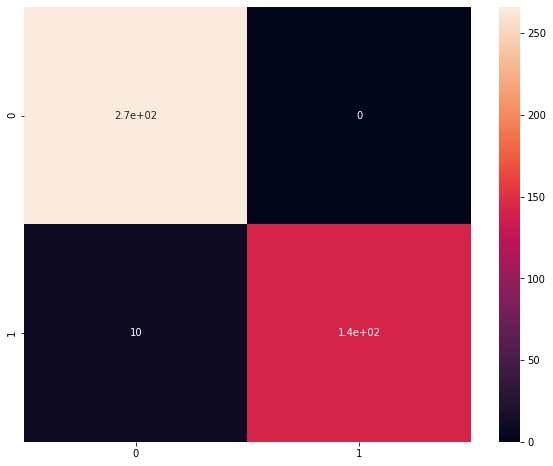

In [157]:
acc = accuracy_score(y_test, rfc_pred)*100
print(acc)
plot_conf_matrix(y_test, rfc_pred)

In [158]:
predictions = test[['PassengerId', 'Survived']]

In [159]:
predictions['rfc_pred'] = rfc_pred

C:\Users\Prestela\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
predictions[predictions['Survived']!=predictions['rfc_pred']]

,PassengerId,Survived,rfc_pred
127,1019,1.0,0.0
140,1032,1.0,0.0
188,1080,1.0,0.0
214,1106,1.0,0.0
283,1175,1.0,0.0
333,1225,1.0,0.0
359,1251,1.0,0.0
365,1257,1.0,0.0
367,1259,1.0,0.0
383,1275,1.0,0.0


In [208]:
from sklearn.ensemble import GradientBoostingClassifier

In [227]:
gbc = GradientBoostingClassifier(max_depth=2,
                               n_estimators=3,
                               learning_rate=0.1)

In [228]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [254]:
params = dict(learning_rate = [0.001,0.01,0.1,1,10,100,1000],
             n_estimators=[2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
              criterion = ['friedman_mse', 'mse', 'mae'],
              max_depth=[2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
             min_samples_leaf=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [255]:
clf = RandomizedSearchCV(gbc, params, random_state=0,n_iter=20,cv=10)

In [256]:
gbc = clf.fit(X_train,y_train)

C:\Users\Prestela\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [257]:
gbc.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 12,
 'max_depth': 700,
 'learning_rate': 0.01,
 'criterion': 'mae'}

In [258]:
#errors= [mean_squared_error(y_test,y_pred) for y_pred in gbc.staged_predict(X_test)]

In [259]:
#best_n_estimators = np.argmin(errors)

In [260]:
gbc = GradientBoostingClassifier(n_estimators= 300,
 min_samples_leaf= 12,
 max_depth= 700,
 learning_rate= 0.01,
 criterion= 'mae')

In [261]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.01,
                           loss='deviance', max_depth=700, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=12,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=300, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [262]:
gbc_pred = gbc.predict(X_test)

97.1291866028708


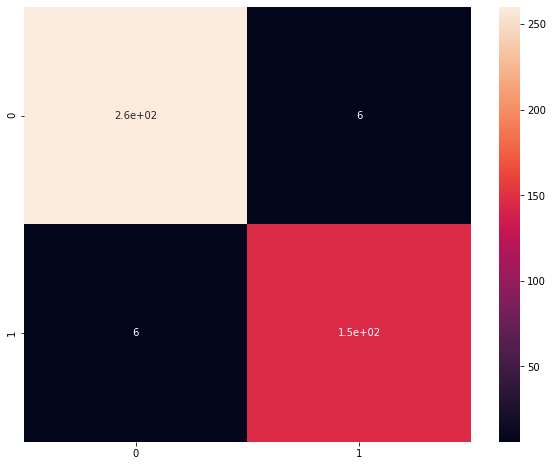

In [263]:
acc = accuracy_score(y_test, gbc_pred)*100
print(acc)
plot_conf_matrix(y_test, gbc_pred)

In [266]:
predictions['gbc_pred']=gbc_pred

C:\Users\Prestela\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [267]:
predictions_final = predictions[['PassengerId', 'rfc_pred']]

In [270]:
predictions_final.to_csv('Predictions.csv')